In [1]:
import scanpy as sc
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams
import seaborn as sb

In [4]:
color_mapping = {
    0: 'blue',
    1: 'red',
    2: 'green',
    3: 'yellow',
    4: 'orange',
    5: 'purple',
    6: 'brown',
    7: 'pink',
    8: 'gray',
    9: 'cyan',
    10: 'black',
    11: 'white',
    12: 'magenta',
    13:'magenta',
     14:'magenta',
}

In [2]:
def spatial_transform_and_save(adata_maldi, adata_st, save_dir, file_num=1, n=2000, color_mapping=None):
    """
    对输入的 adata_maldi 和 adata_st 进行细胞名对齐、随机选择、空间变换，并保存结果。
    返回 new_adata_maldi, new_adata_st
    """
    import os
    import numpy as np
    import matplotlib.pyplot as plt

    # 细胞名对齐
    adata_maldi = adata_maldi.copy()
    adata_st = adata_st.copy()
    adata_maldi.obs_names = adata_st.obs_names.copy()

    # 随机选择 n 个细胞
    selected_cells = np.random.choice(adata_maldi.obs_names, size=n, replace=False)
    new_adata_maldi = adata_maldi[selected_cells, :].copy()
    new_adata_st = adata_st[selected_cells, :].copy()

    # 空间变换参数
    theta = np.radians(np.random.uniform(-10, 10))
    cos, sin = np.cos(theta), np.sin(theta)
    rotation_matrix = np.array([
        [cos, -sin, 0],
        [sin, cos, 0],
        [0, 0, 1]
    ])
    scale_factor = np.random.uniform(0.9, 1.1)
    scaling_matrix = np.array([
        [scale_factor, 0, 0],
        [0, scale_factor, 0],
        [0, 0, 1]
    ])
    translate_x = np.random.uniform(-10, 10)
    translate_y = np.random.uniform(-10, 10)
    translation_matrix = np.array([
        [1, 0, translate_x],
        [0, 1, translate_y],
        [0, 0, 1]
    ])
    shear_factor = np.random.uniform(0.9, 1.1)
    shear_matrix = np.array([
        [1, shear_factor - 1, 0],
        [shear_factor - 1, 1, 0],
        [0, 0, 1]
    ])
    transformation_matrix = np.dot(np.dot(translation_matrix, scaling_matrix), rotation_matrix)
    transformation_matrix = np.dot(shear_matrix, transformation_matrix)

    def apply_transformation(coordinates, transformation_matrix):
        transformed_coordinates = np.dot(coordinates, transformation_matrix.T)
        return transformed_coordinates

    def random_nonlinear_transformation(coordinates, scale=10):
        x, y = coordinates.T
        random_shift_x = scale * (np.random.rand(*x.shape) - 0.5)
        random_shift_y = scale * (np.random.rand(*y.shape) - 0.5)
        new_x = x + random_shift_x
        new_y = y + random_shift_y
        return np.vstack([new_x, new_y]).T

    # 对 new_adata_maldi 的空间坐标进行空间变换
    spatial_data_maldi = new_adata_maldi.obsm['spatial'].copy()
    for _ in range(1):
        sample_indices = np.random.choice(spatial_data_maldi.shape[0], size=int(spatial_data_maldi.shape[0] * 0.9), replace=False)
        sample_coords = spatial_data_maldi[sample_indices]
        homogeneous_sample_coords = np.hstack([sample_coords, np.ones((sample_coords.shape[0], 1))])
        transformed_sample_coords = apply_transformation(homogeneous_sample_coords, transformation_matrix)
        transformed_sample_coords = transformed_sample_coords[:, :2]
        transformed_sample_coords = random_nonlinear_transformation(transformed_sample_coords)
        spatial_data_maldi[sample_indices] = transformed_sample_coords

    new_adata_maldi.obs['spatialX'] = spatial_data_maldi[:, 0]
    new_adata_maldi.obs['spatialY'] = spatial_data_maldi[:, 1]
    new_adata_maldi.obsm['spatial'] = spatial_data_maldi

    # 保存
    os.makedirs(save_dir, exist_ok=True)
    maldi_path = os.path.join(save_dir, f"new_adata_maldi_{file_num}.h5ad")
    st_path = os.path.join(save_dir, f"new_adata_st_{file_num}.h5ad")
    new_adata_maldi.write(maldi_path)
    new_adata_st.write(st_path)
    print("保存完成：", maldi_path, st_path)

    # 可视化（可选）
    if color_mapping is not None:
        plt.figure(figsize=(6, 6))
        plt.scatter(
            new_adata_maldi.obsm['spatial'][:, 0],
            new_adata_maldi.obsm['spatial'][:, 1],
            c=[color_mapping[category] for category in new_adata_maldi.obs["clusters"].astype(int).tolist()],
            label='new_adata_maldi'
        )
        plt.title('Spatial Distribution: new_adata_maldi')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.legend()
        plt.show()

        plt.figure(figsize=(6, 6))
        plt.scatter(
            new_adata_st.obsm['spatial'][:, 0],
            new_adata_st.obsm['spatial'][:, 1],
            c=[color_mapping[category] for category in new_adata_st.obs["clusters"].astype(int).tolist()],
            label='new_adata_st'
        )
        plt.title('Spatial Distribution: new_adata_st')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.legend()
        plt.show()

    return new_adata_maldi, new_adata_st

In [ ]:
# 使用 spatial_transform_and_save 函数

调用方式如下：

- adata_maldi: MALDI AnnData 对象
- adata_st: ST AnnData 对象
- save_dir: 保存目录（如 r"I:\mutiomics\data\pseudo_revision_2\m1\benchmark_m1"）
- file_num: 文件编号（如 1）
- n: 随机选择的细胞数量（如 2000）
- color_mapping: （可选）类别颜色映射字典


# 假设已加载 adata_maldi, adata_st，并定义了 color_mapping
new_adata_maldi, new_adata_st = spatial_transform_and_save(
    adata_maldi,
    adata_st,
    save_dir=r"I:\mutiomics\data\pseudo_revision_2\m3\benchmark_m3",
    file_num=1,
    n=2000,
    color_mapping=color_mapping
)

In [7]:
adata_maldi
adata_st 

AnnData object with n_obs × n_vars = 2239 × 15249
    obs: 'in_tissue', 'array_row', 'array_col', 'mt_frac', 'total_counts', 'n_counts', 'n_genes', 'clusters', 'leiden'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'clusters', 'clusters_colors', 'hvg', 'log1p', 'neighbors', 'pca', 'spatial', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

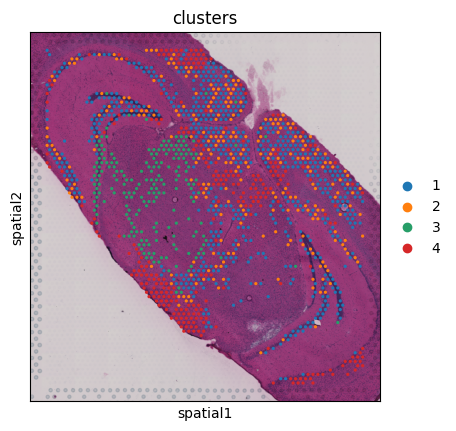

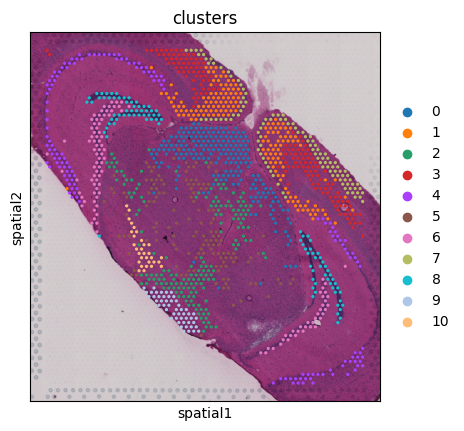

保存完成： I:\mutiomics\data\pseudo_revision_2\m4\benchmark_m4\new_adata_maldi_10.h5ad I:\mutiomics\data\pseudo_revision_2\m4\benchmark_m4\new_adata_st_10.h5ad


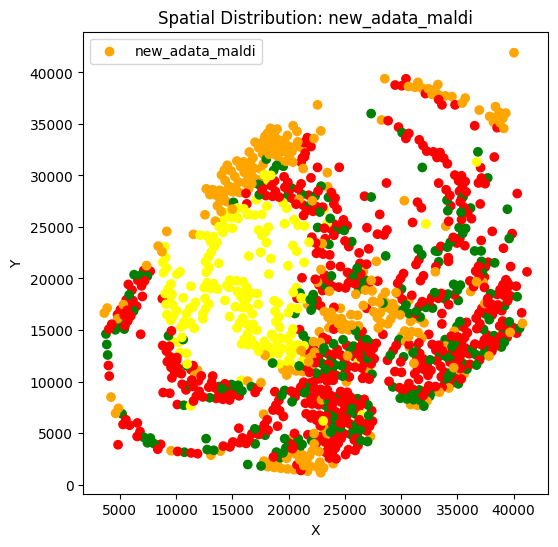

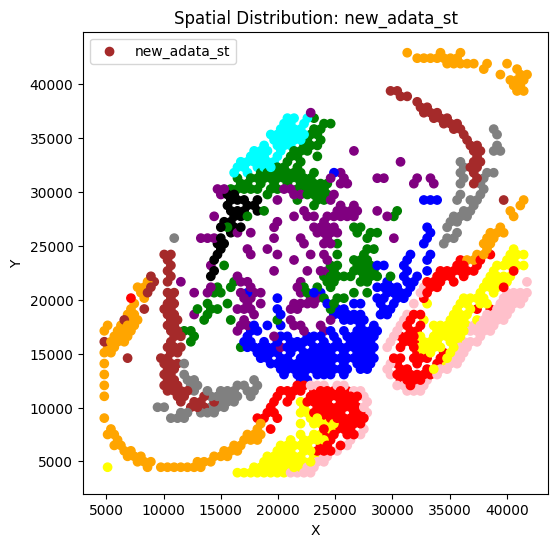

In [28]:
adata_maldi = sc.read_h5ad("I:\\mutiomics\\data\\pseudo_revision_2\\m4\\b_predict.h5ad")
adata_maldi.obs["leiden"] = adata_maldi.obs["b_prime_label"]
adata_maldi.obs["clusters"] = adata_maldi.obs["leiden"]
sc.pl.spatial(adata_maldi, img_key = "hires", color="clusters")
adata_st = sc.read_h5ad("I:\\mutiomics\\Spatial Multimodal Analysis of Transcriptomes and Metabolomes in Tissues\\m4\\m4_visium_ctrl.h5ad")
adata_st.obs["leiden"] = adata_st.obs["clusters"]
sc.pl.spatial(adata_st, img_key = "hires", color="clusters")
new_adata_maldi, new_adata_st = spatial_transform_and_save(
    adata_maldi,
    adata_st,
    save_dir=r"I:\mutiomics\data\pseudo_revision_2\m4\benchmark_m4",
    file_num=10,
    n=1200,
    color_mapping=color_mapping
)